# Multiple linear regression on Bike sharing

# 1.Importing Libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")           # doesn't show warnings message

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split

# 2. Reading Dataset and Understanding Data


In [2]:
boom=pd.read_csv("D://day.csv")     # loading the dataframe and checking top 5 values
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking for any null values and data types
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#Quality check
boom.isnull().sum()   #checking for null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
boom.shape

(730, 16)

In [6]:
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### insights
Dataset has 730 rows and 16 columns.

No null values

one column is object type, all other columns are either float or integer type.we will convert the data into suitabe form in the next steps

In [7]:
for column in boom:
    print(boom[column].value_counts(ascending=True),"/n/n/n")

1      1
482    1
483    1
484    1
485    1
      ..
247    1
248    1
249    1
251    1
730    1
Name: instant, Length: 730, dtype: int64 /n/n/n
27-01-2019    1
17-12-2019    1
06-12-2018    1
10-01-2019    1
20-02-2019    1
             ..
14-09-2018    1
11-03-2018    1
11-04-2019    1
17-05-2019    1
29-11-2019    1
Name: dteday, Length: 730, dtype: int64 /n/n/n
4    178
1    180
2    184
3    188
Name: season, dtype: int64 /n/n/n
0    365
1    365
Name: yr, dtype: int64 /n/n/n
2     56
4     60
6     60
9     60
11    60
1     62
3     62
5     62
7     62
8     62
10    62
12    62
Name: mnth, dtype: int64 /n/n/n
1     21
0    709
Name: holiday, dtype: int64 /n/n/n
3    103
2    104
4    104
5    104
0    105
1    105
6    105
Name: weekday, dtype: int64 /n/n/n
0    231
1    499
Name: workingday, dtype: int64 /n/n/n
3     21
2    246
1    463
Name: weathersit, dtype: int64 /n/n/n
34.200847    1
14.110847    1
25.454153    1
5.227500     1
21.320000    1
            ..
23.130847 

In [8]:
boom_dup = boom.copy()

# Checking for duplicates
print(boom_dup.drop_duplicates(subset=None, inplace=True))
print(boom.shape)

None
(730, 16)


#### insights
No duplicate values in the data as the columns and row number remain the same after dropping duplicates and no junk values in as can be seen in value counts

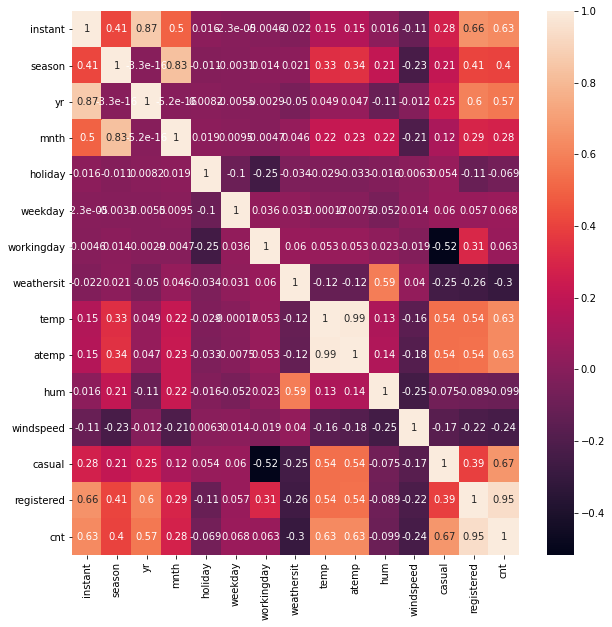

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(boom.corr(),annot=True)
plt.show()

In [10]:
boom.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Removing columns not required for analysis
Columns that are removed:

instant :it has index value which is not required

dteday :we have seperate columns yr,mnth having same values

casual and registered : cnt can be used for the analysis as it has the sum of these values and to avoid collinearity between them.

In [11]:
new_boom=boom[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

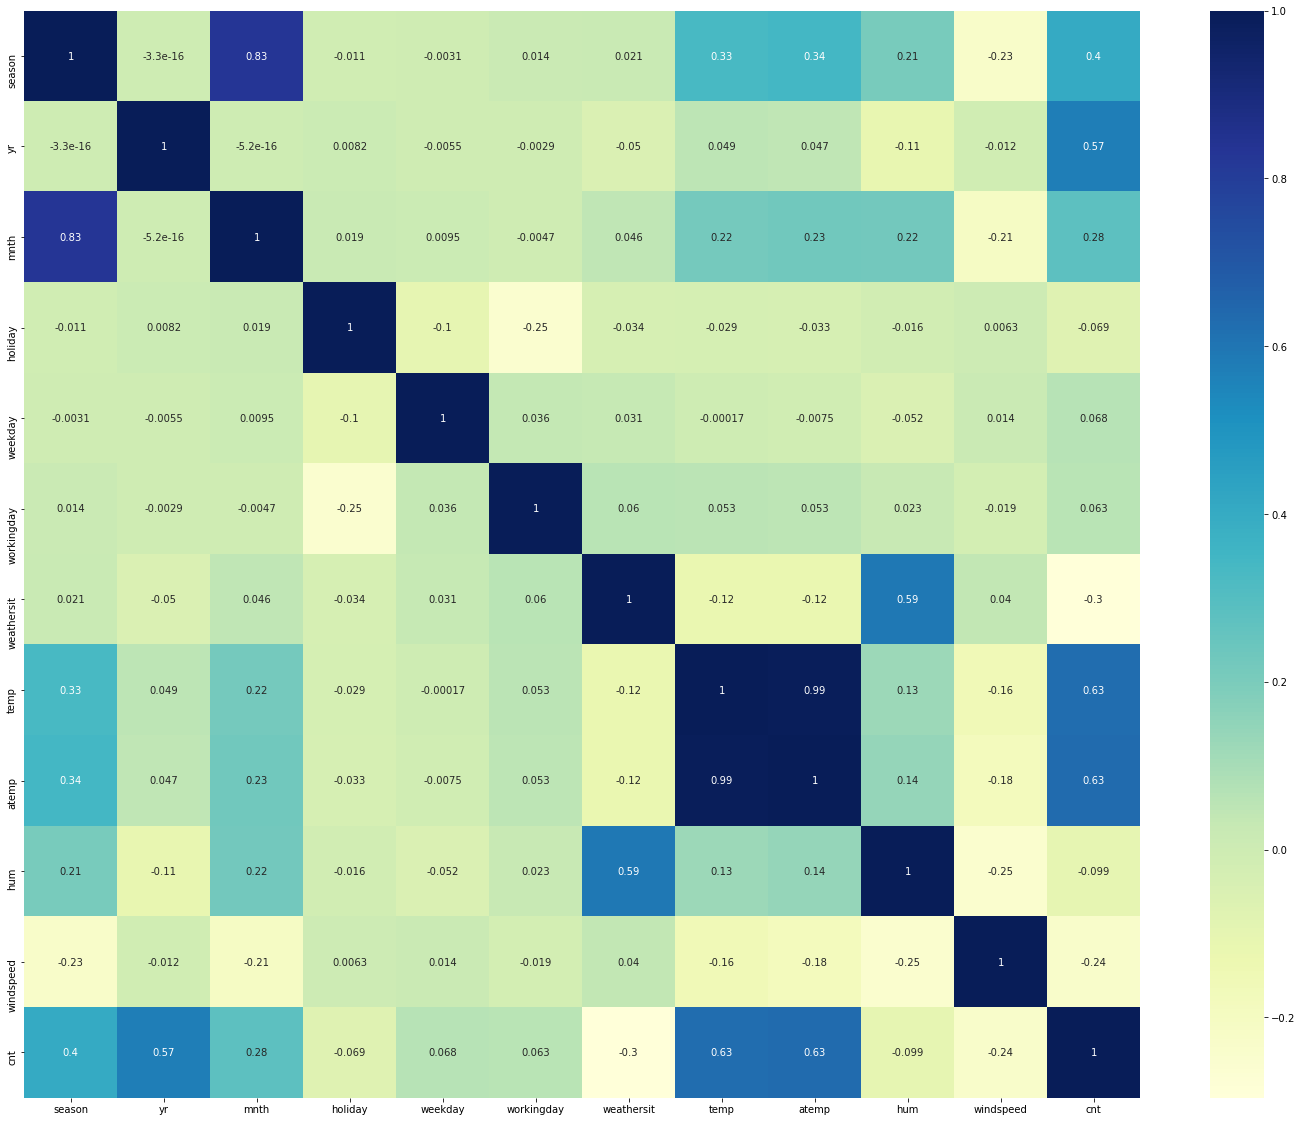

In [12]:
# checking for collinearity
plt.figure(figsize=(25,20))
sns.heatmap(new_boom.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Temp, atemp, yr are showing more collinearity
The heatmap can be used to see the multicollinearity between variables and target variable.
This will be used to compare the results 
of model building


In [13]:
new_boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
new_boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables
Creating DUMMY variables for categorical variables 'mnth', 'weekday', 'season' and 'weathersit'.
converting them into 'category' data types

In [15]:
new_boom.season=new_boom.season.astype("category")
new_boom.weathersit=new_boom.weathersit.astype("category")
new_boom.mnth=new_boom.mnth.astype("category")
new_boom.weekday=new_boom.weekday.astype("category")
new_boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [16]:
new_boom=pd.get_dummies(new_boom,drop_first=True)
new_boom.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
new_boom.shape

(730, 30)

In [18]:
# Cheking data types after conversion
new_boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### Splitting the Data into train and test set
splitting the data in the ratio of 70:30 and checking the shape to confirm the proper split

In [19]:
np.random.seed(0)
df_train,df_test =train_test_split(new_boom,train_size=0.70,random_state=100) # using ramdom state to get same values each time

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [21]:
df_train.shape

(510, 30)

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   cnt           220 non-null    int64  
 8   season_2      220 non-null    uint8  
 9   season_3      220 non-null    uint8  
 10  season_4      220 non-null    uint8  
 11  mnth_2        220 non-null    uint8  
 12  mnth_3        220 non-null    uint8  
 13  mnth_4        220 non-null    uint8  
 14  mnth_5        220 non-null    uint8  
 15  mnth_6        220 non-null    uint8  
 16  mnth_7        220 non-null    uint8  
 17  mnth_8        220 non-null    uint8  
 18  mnth_9        220 non-null  

In [23]:
df_test.shape

(220, 30)

In [24]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,1,0


### EDA
Visualing numeric variables of train data set using pair plot

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

<Figure size 720x2160 with 0 Axes>

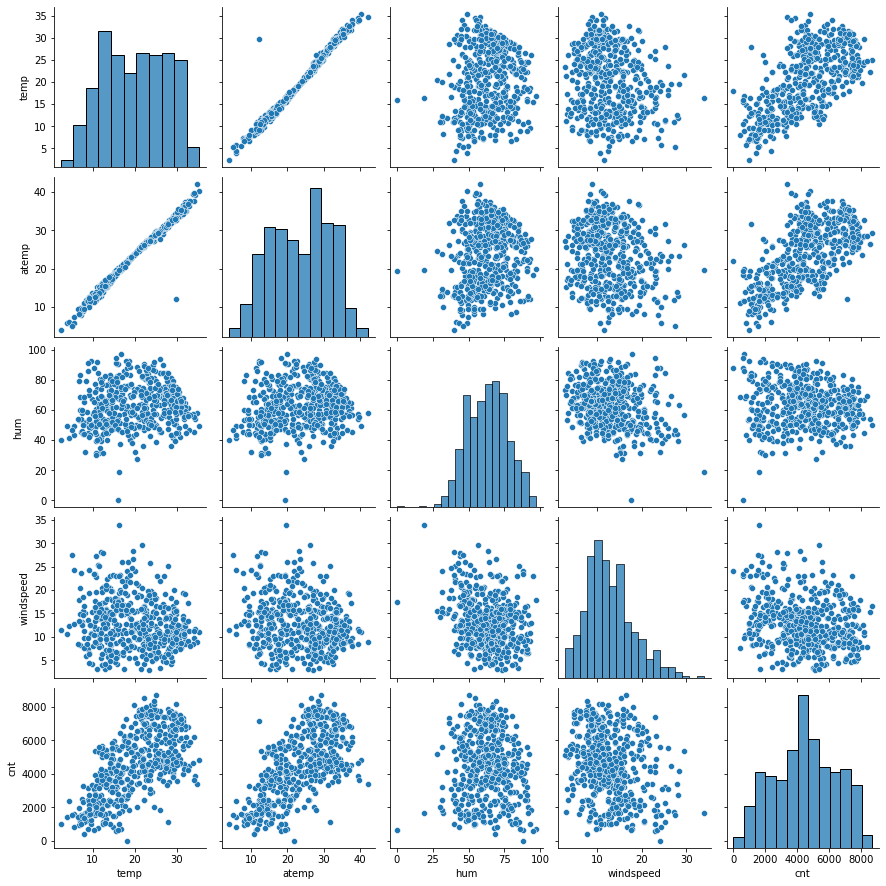

In [27]:
boom_nmr=df_train[["temp","atemp","hum","windspeed","cnt"]]
plt.figure(figsize=(10,30))
sns.pairplot(boom_nmr)
plt.show()

### Insights
There is Linear relation between temp,atemp and cnt

### Visualising categorical variables using boxplots

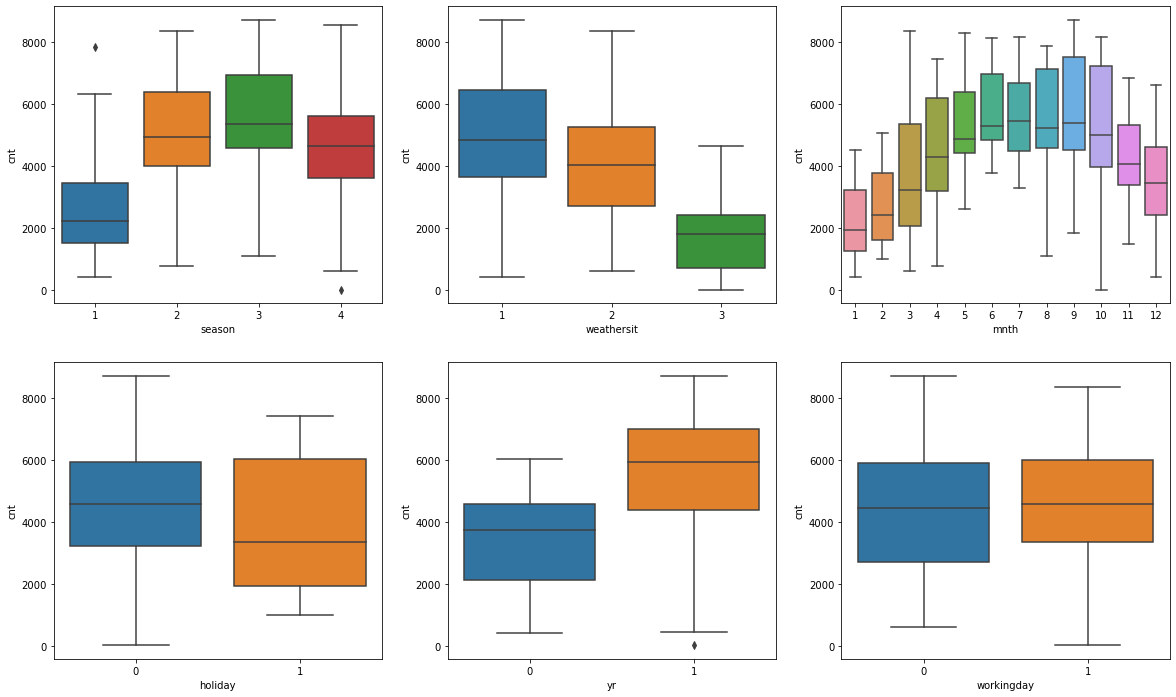

In [28]:
df=boom
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

### Insights
Insights
There are six categorical variables in the dataset.

season: The bookings are more in season 3 with median around 5000 followed by seasons 2,4 and 1. This indicates, season can be a good predictor for the dependent variable.

weathersit: Weather_sit 1 has more bookings with median of around 5000 followed by weather_sit 2 and 3

mnth:Months 5,6,7,8,9,10 have more bookings and  This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

holiday: holiday has almost same bookings with holiday 0 having a slightly more value.

weekday: almost same bookings on all weekdays. we can get more details after analysis

workingday: It has almost same values

yr: Demand seems to be growing from 2018 to 19

##  RESCALING

In [29]:
# Importing scaler from sklearn library
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()

In [31]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
# Applying scaler to numeric variables of train data
 
nmr = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[nmr] = scaler.fit_transform(df_train[nmr])

In [33]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model building

In [35]:
# taking cnt as target variable
y_train=df_train.pop("cnt")
X_train=df_train

In [36]:
from sklearn.feature_selection import RFE # importing RFE(recursive feature elimination) and linear regression from scikit
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()
lr.fit(X_train, y_train)
rf=RFE(lr,15)      # using rfe to get top 15 variables
rf=rf.fit(X_train,y_train)

In [38]:
list(zip(X_train.columns,rf.support_,rf.ranking_)) # ranking variabled using rfe

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [39]:
sup = X_train.columns[rf.support_] 
sup

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [40]:
# Taking rfe supported columns and dropping the rest
X_train_rf=X_train[sup] 
X_train_rf.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

### Linear model using stats model

### Model no. 1

In [41]:
# Checking VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating dataframe containing the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_rf.values, i) for i in range(X_train_rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.91


In [42]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rf)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [43]:
lr1.params

const           0.195221
yr              0.230148
holiday        -0.054466
workingday      0.044468
temp            0.497208
hum            -0.163900
windspeed      -0.182540
season_2        0.118324
season_3        0.029169
season_4        0.143004
mnth_8          0.047286
mnth_9          0.117613
mnth_10         0.041624
weekday_6       0.053083
weathersit_2   -0.057693
weathersit_3   -0.250689
dtype: float64

In [44]:
print(lr1.summary())  # Checking R2,p-value,prob of f-statistic etc

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          5.17e-191
Time:                        22:44:07   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790   

### removing season_3 as it has high p value and high vif

In [45]:
X_train_new = X_train_rf.drop(["season_3"], axis = 1)

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,season_4,2.25
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.84
10,mnth_10,1.61


In [47]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [48]:
lr2.params

const           0.194758
yr              0.229241
holiday        -0.055677
workingday      0.044188
temp            0.530905
hum            -0.170764
windspeed      -0.185795
season_2        0.104917
season_4        0.134863
mnth_8          0.055722
mnth_9          0.125195
mnth_10         0.038505
weekday_6       0.052702
weathersit_2   -0.056753
weathersit_3   -0.246985
dtype: float64

In [49]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          8.70e-192
Time:                        22:44:08   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

### Removing the variable 'hum' based on its Very High 'VIF' value

In [50]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,season_4,2.00
5,season_2,1.83
10,weekday_6,1.77
9,mnth_10,1.60
7,mnth_8,1.59
11,weathersit_2,1.55


In [52]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [53]:
lr3.params

const           0.093743
yr              0.233082
holiday        -0.054099
workingday      0.047315
temp            0.510620
windspeed      -0.152990
season_2        0.101899
season_4        0.126666
mnth_8          0.053932
mnth_9          0.118514
mnth_10         0.034306
weekday_6       0.057825
weathersit_2   -0.083999
weathersit_3   -0.292947
dtype: float64

In [54]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.97e-188
Time:                        22:44:09   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0937      0.019      4.914   

### Removing  mnth_10 as it has high p value

In [55]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


In [57]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [58]:
# Check the parameters obtained
lr4.params

const           0.090297
yr              0.232711
holiday        -0.056011
workingday      0.046317
temp            0.518828
windspeed      -0.150835
season_2        0.100362
season_4        0.138202
mnth_8          0.050952
mnth_9          0.113626
weekday_6       0.056927
weathersit_2   -0.083049
weathersit_3   -0.287225
dtype: float64

In [59]:
print(lr4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          8.64e-189
Time:                        22:44:09   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740   

## Final model
### Insights

The model looks good, as there is low Multicollinearity between the predictors and the p-values for all
the predictors seems to be significant.We can consider this as the final model

As per Hypothesis testing-
H0: Beta1 = 0
H1: Beta 1 != 0

#### lr4 coefficients-

const           0.090297
yr              0.232711
holiday        -0.056011
workingday      0.046317
temp            0.518828
windspeed      -0.150835
season_2        0.100362
season_4        0.138202
mnth_8          0.050952
mnth_9          0.113626
weekday_6       0.056927
weathersit_2   -0.083049
weathersit_3   -0.287225

From our model all coefficients are non zero, so we can reject the null hypothisis

#### F-statistics-

the model has
 F-statistic:                     217.0 (which is greater than 1)
Prob (F-statistic):          8.64e-189 (which is low)
p-value:                      0(approx)
R-squared:                       0.840
So, overall model is significant  and 84% value is explained by the model which is good

#### The equation of best fit line is:
cnt= 0.0903+(yr*0.232711)+(holiday*-0.056011)+(workingday*0.046317)+(temp*0.518828)+(windspeed*-0.150835)+(season_2*0.100362)+(season_4*0.138202)+(mnth_8*0.050952)+(mnth_9*0.113626)+(weekday_6*0.056927)+(weathersit_2*-0.083049)+(weathersit_3*-0.287225)
        

Coefficients:
ex: 
temp: A coefficient value of ‘0.518828’ indicated that a unit increase in temp variable, increases the bike hire numbers in multiple of 0.518828 units + 0.903

weathersit_3: A coefficient value of ‘-0.287’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.287 units.

yr: A coefficient value of ‘0.23’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.23 units.

similarly for other variables the bike hire varies as in examples above


# RESIDUAL ANALYSIS

## Checking to see if error terms are normally distributed in training data

In [60]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

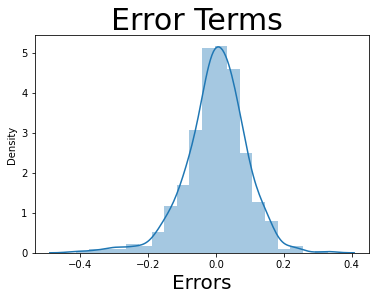

In [61]:
residuals = y_train-y_train_pred
# Plotting histogram of error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 30)                  # Giving a title for the plot 
plt.xlabel('Errors', fontsize = 20)                         # Labelling the X axis values

### Insights
The assumption is correct as Residuals are normally distributed.

## Checking for multicollinearity in predictor variables

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


### Insight
No multicollinearity between the predictor variables  as all the values are within permissible range of below 5.Ignoring temp as it is closer to 5 and not a very high value

### Scalling test set

In [63]:
# Applying scaler to all the numeric variables in test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [67]:
#Selecting the variables that were part of the final model
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant to test df
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   workingday    220 non-null    int64  
 4   temp          220 non-null    float64
 5   windspeed     220 non-null    float64
 6   season_2      220 non-null    uint8  
 7   season_4      220 non-null    uint8  
 8   mnth_8        220 non-null    uint8  
 9   mnth_9        220 non-null    uint8  
 10  weekday_6     220 non-null    uint8  
 11  weathersit_2  220 non-null    uint8  
 12  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(3), uint8(7)
memory usage: 13.5 KB


In [68]:
# Making the predictions using the lr4 model/final model

y_pred = lr4.predict(X_test_lm4)

# Evauating the model

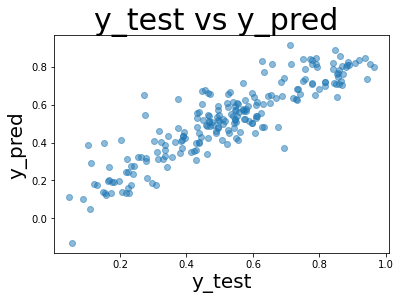

In [69]:
#  y_test and y_pred scatterplot to see the spread 
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 30)              # Plot title 
plt.xlabel('y_test', fontsize = 20)                          # Lbelling X-axis
plt.ylabel('y_pred', fontsize = 20) 
plt.show()

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7974599854948248

In [71]:
#checking shape of X_test
X_test.shape

(220, 12)

In [72]:
r2=0.7974599854948248


# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along the axis 1
p = X_test.shape[1]

# Adjusted R-squared formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7857185353785827

In [73]:
#calculating adjusted r2 for train data
r2=0.84

# n is number of rows in X

n = X_train_new.shape[0]


# Number of features (predictors, p) is the shape along the axis 1
p = X_train_new.shape[1]

# Adjusted R-squared formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8361368209255533

In [74]:
#### Comparisong test and train data 
Train R^2 :0.840
Train Adjusted R^2 :0.84
Test R^2 :0.797
Test Adjusted R^2 :0.785
not much difference between train and test data. So we can say the model is good.
Not overfitted or has multicollinearity between varibales

SyntaxError: invalid syntax (<ipython-input-74-ec3480ababa4>, line 2)

# -

# Assignment-based Subjective Questions


### 1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? 

####   1. The demand for bikes has grown from 2018 to 2019
####   2.The demand is low in weathersit_3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
####   3.The demand is high in september and also in august
####   4.The demand gets lower when wind speed is high and when there is holiday


### 2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)

#### ANS:  It is important to drop a column while creating dummy variables as we can get the value of the column using other column values. ex: if we convert a column into three dummy variables the numbers assigned will be in the order 001,010,100 so we can get the value of dropped column as 1 if other columns are zero and vice versa. 

### 3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?

#### ANS: Looking at the pair plot  "TEMP"  has the highest correlation with "cnt"

###  4. How did you validate the assumptions of Linear Regression after building the model on the training set?

#### ANS: I checked for multicolinearity by looking at vif values  and whether residuals are normally distributed with mean equals to zero and found the assumptions made were true


### 5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes? (2 marks)

####  ANS: The three features are TEMP,WEATHERSIT_3,YR
